# Task # 2 - To Explore Supervised Machine Learning 
**Name**:Utkarsh Patel 



#### In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables. 

 
 

##### Problem statements:
                       1.What will be predicted score if a student study for 9.25 hrs in a day?

                    



### Step1: Understanding the data

In [1]:
import pandas as pd                 # It is used to perform data manipulation and analysis
import numpy as np                  # For all kind of Mathematical as well as Statistical computation
import matplotlib as plt
import matplotlib.pyplot as pl      # For data visualization usings pplots and graphs
import seaborn as sn

In [2]:
#Get the data
student_score=pd.read_csv('C:\\Users\\Utkarsh Patel\\Desktop\\Student_score.csv')

In [3]:
student_score.head(5)    #get the first 5 rows 

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
student_score.tail(5)  ##get the last 5 rows 

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
student_score.shape               #Dimension of the data frame

(25, 2)

In [6]:
student_score.size               #Total elements in the df

50

In [7]:
student_score.isnull().sum()      #total NA values in each coloumn

Hours     0
Scores    0
dtype: int64

In [8]:
student_score.info()           #overall info about df 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
student_score.describe()                 #statistics about df

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Step 2:outtliers and missing values imputation

There is no missing values in given data

### Step3: Data visulization

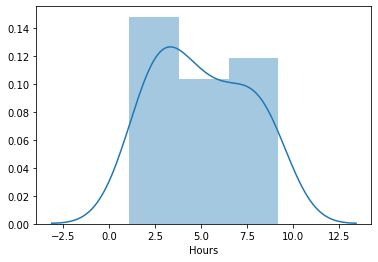

In [10]:

sn.distplot(student_score['Hours'])          #distplot for numerical type variable
                                         

the minimum no of hours studied by student is a 1.1 hours and maximum is 9.2.On an average no of hours studied by student is 5 and their corresponding score is 51.

### Step4: Model Building

In [11]:
X = student_score.iloc[:, :-1].values #feature (IV)
y = student_score.iloc[:, -1].values   #DV(Lable/ Output)


Text(0, 0.5, 'Score')

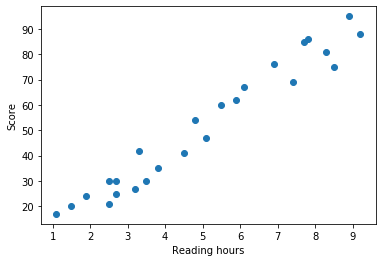

In [12]:
pl.scatter(X,y)
pl.xlabel('Reading hours')
pl.ylabel('Score')



In [13]:
# Splitting the student_score into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 0)




Text(0, 0.5, 'Score')

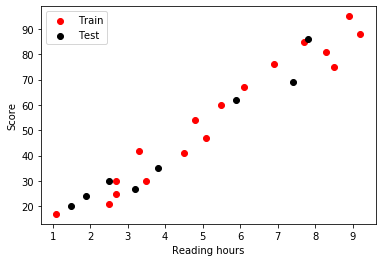

In [14]:
pl.scatter(X_train,y_train, color='red')
pl.scatter(X_test,y_test, color='black')
pl.legend(['Train','Test'])
pl.xlabel('Reading hours')
pl.ylabel('Score')




In [15]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression

lr= LinearRegression()



In [16]:
#### Train the model to Learn

lr.fit(X_train, y_train)




LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
#### Predicting the Test set results

y_pred =lr.predict(X_test)
y_pred



array([17.05366541, 33.69422878, 74.80620886, 26.8422321 , 60.12335883,
       39.56736879, 20.96909209, 78.72163554])

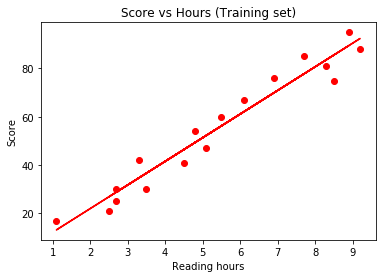

In [18]:
# Visualising the Training set results
pl.scatter(X_train, y_train, color = 'red')
pl.plot(X_train, lr.predict(X_train), color = 'red')
pl.title('Score vs Hours (Training set)')
pl.xlabel('Reading hours')
pl.ylabel('Score')
pl.show()



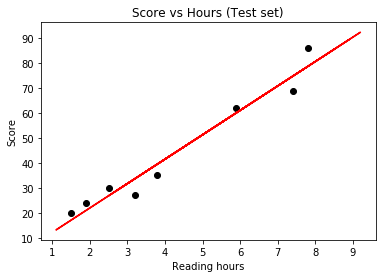

In [19]:
# Visualising the Test set results
pl.scatter(X_test, y_test, color = 'black')
pl.plot(X_train, lr.predict(X_train), color = 'red')
pl.title('Score vs Hours (Test set)')
pl.xlabel('Reading hours')
pl.ylabel('Score')
pl.show()



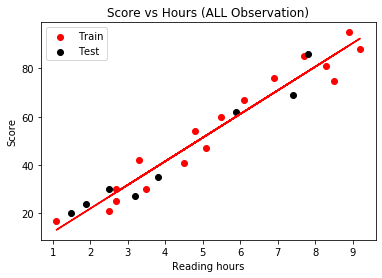

In [20]:
# Visualising the ALL results
pl.scatter(X_train, y_train, color = 'red')
pl.scatter(X_test, y_test, color = 'black')
pl.legend(['Train','Test'])
pl.plot(X_train, lr.predict(X_train), color = 'red')
pl.title('Score vs Hours (ALL Observation)')
pl.xlabel('Reading hours')
pl.ylabel('Score')

pl.show()

In [21]:
# y = b0 +  b1*X 

lr.coef_   #b1


array([9.78856669])

In [22]:
lr.intercept_  #b0


2.370815382341881

### Evaluating model performance

#### Root Mean Square Error(RMSE)


In [23]:
from sklearn.metrics import mean_squared_error
from math import sqrt


sqrt(mean_squared_error(y_test,y_pred))

4.792191274636315

##### i.e. average Error(difference b/w  actual & predicted Salary) is 4 percentage.

***
#### R2 score
How good is our Line compare to Average Line anybody can think of. (How goo our model fitted)

##### R2 Closer to 1  ==>  our model is better.

In [24]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9568211104435257

In [25]:
#or 
lr.score(X_test,y_test)

0.9568211104435257

Here r2 value is 0.95 and RMSE is 4.79 percentage.so we can say that it is good model for the prediction of the Score

In [26]:
#predicted score if a student study for 9.25 hrs in a day?
# for X=9.25 hours 
Score=lr.predict([[9.25]])    
Score

array([92.91505723])

# conclusion
 
Score of the student is 92.91,who study for 9.25 hrs in a day